In [2]:
import torch
import numpy as np
from itertools import combinations_with_replacement
import dimensionalityreductionmethods as drm

In [3]:
def generate_polynomial_data(
    n_samples=100,
    input_dim=3,
    output_dim=2,
    max_degree=3,
    add_bias=True,
    include_cross_terms=True,
):
    x = np.random.rand(n_samples, input_dim)
    y = np.zeros((n_samples, output_dim))

    alphas = np.random.rand(output_dim, input_dim, max_degree)
    biases = np.random.rand(output_dim) if add_bias else np.zeros(output_dim)

    for j in range(output_dim):
        y_j = np.zeros(n_samples)
        for i in range(input_dim):
            for d in range(1, max_degree + 1):
                y_j += alphas[j, i, d - 1] * (x[:, i] ** d)

        # Add cross-terms for more complex polynomial behavior, if requested
        if include_cross_terms:
            for combo in combinations_with_replacement(range(input_dim), 2):
                cross_alpha = np.random.rand()
                y_j += cross_alpha * (x[:, combo[0]] * x[:, combo[1]])

        y[:, j] = y_j + biases[j]

    return x, y


def noise_model(x_normalized, factor=1):
    """
    Adds noise based on the overall variance of all elements in x_normalized.

    Parameters:
        x_normalized: A Tensor of normalized data where noise needs to be added.
        factor (float): the factor by which the noise is multiplied by, default is 1.

    Returns:
        A function to add noise to a given x.
    """
    overall_variance = torch.var(x_normalized, unbiased=False)
    overall_noise_std = torch.sqrt(overall_variance)

    def add_noise(x_obs):
        noise = torch.randn_like(x_obs) * overall_noise_std * factor
        noisy_x = x_obs + noise

        return noisy_x

    return add_noise

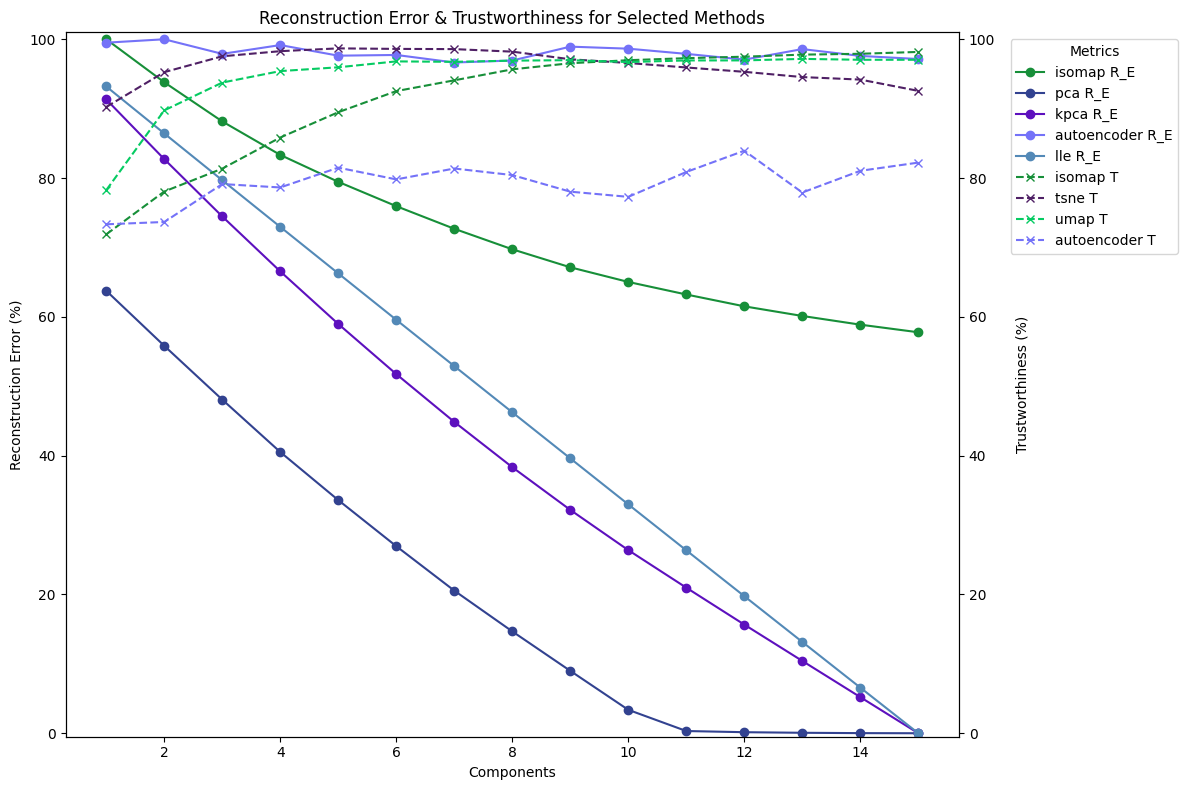

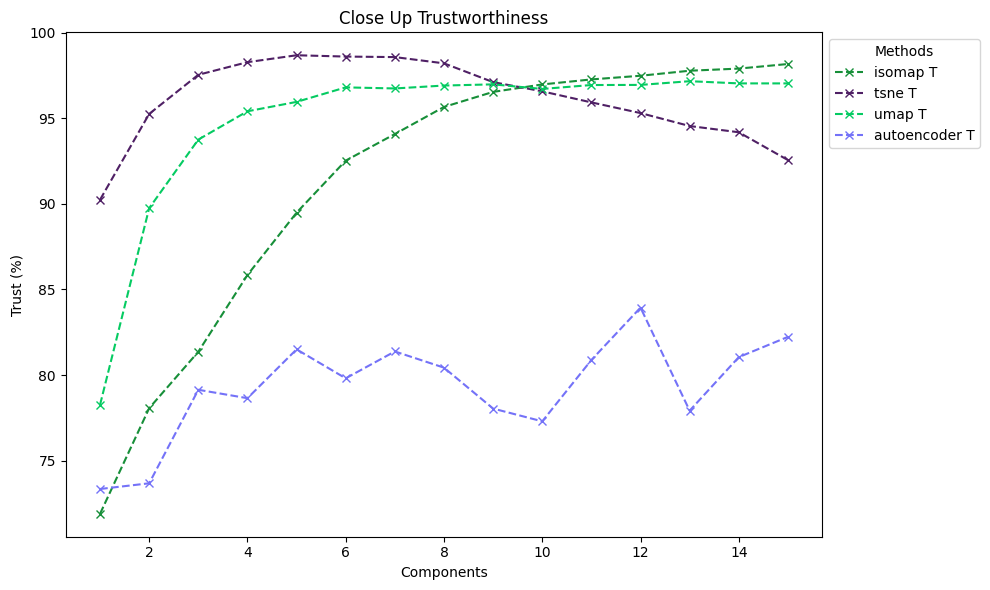

| Method      | Opt. Trustworthiness Components   | Max Trustworthiness   | Opt. Error Components   | Min R. Error           |         time |
|-------------|-----------------------------------|-----------------------|-------------------------|------------------------|--------------|
| isomap      | 15                                | 98.17772357723578     | 15                      | 57.77931453487012      |   1.53247    |
| pca         | -                                 | -                     | 15                      | 1.1102230246251565e-14 |   0.00297737 |
| tsne        | 5                                 | 98.68943089430894     | -                       | -                      | 145.683      |
| umap        | 13                                | 97.17341463414634     | -                       | -                      |  21.6957     |
| kpca        | -                                 | -                     | 15                      | 0.0                    |   0.550721   |
| auto

c:\Users\darianz\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\darianz\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\darianz\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\darianz\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


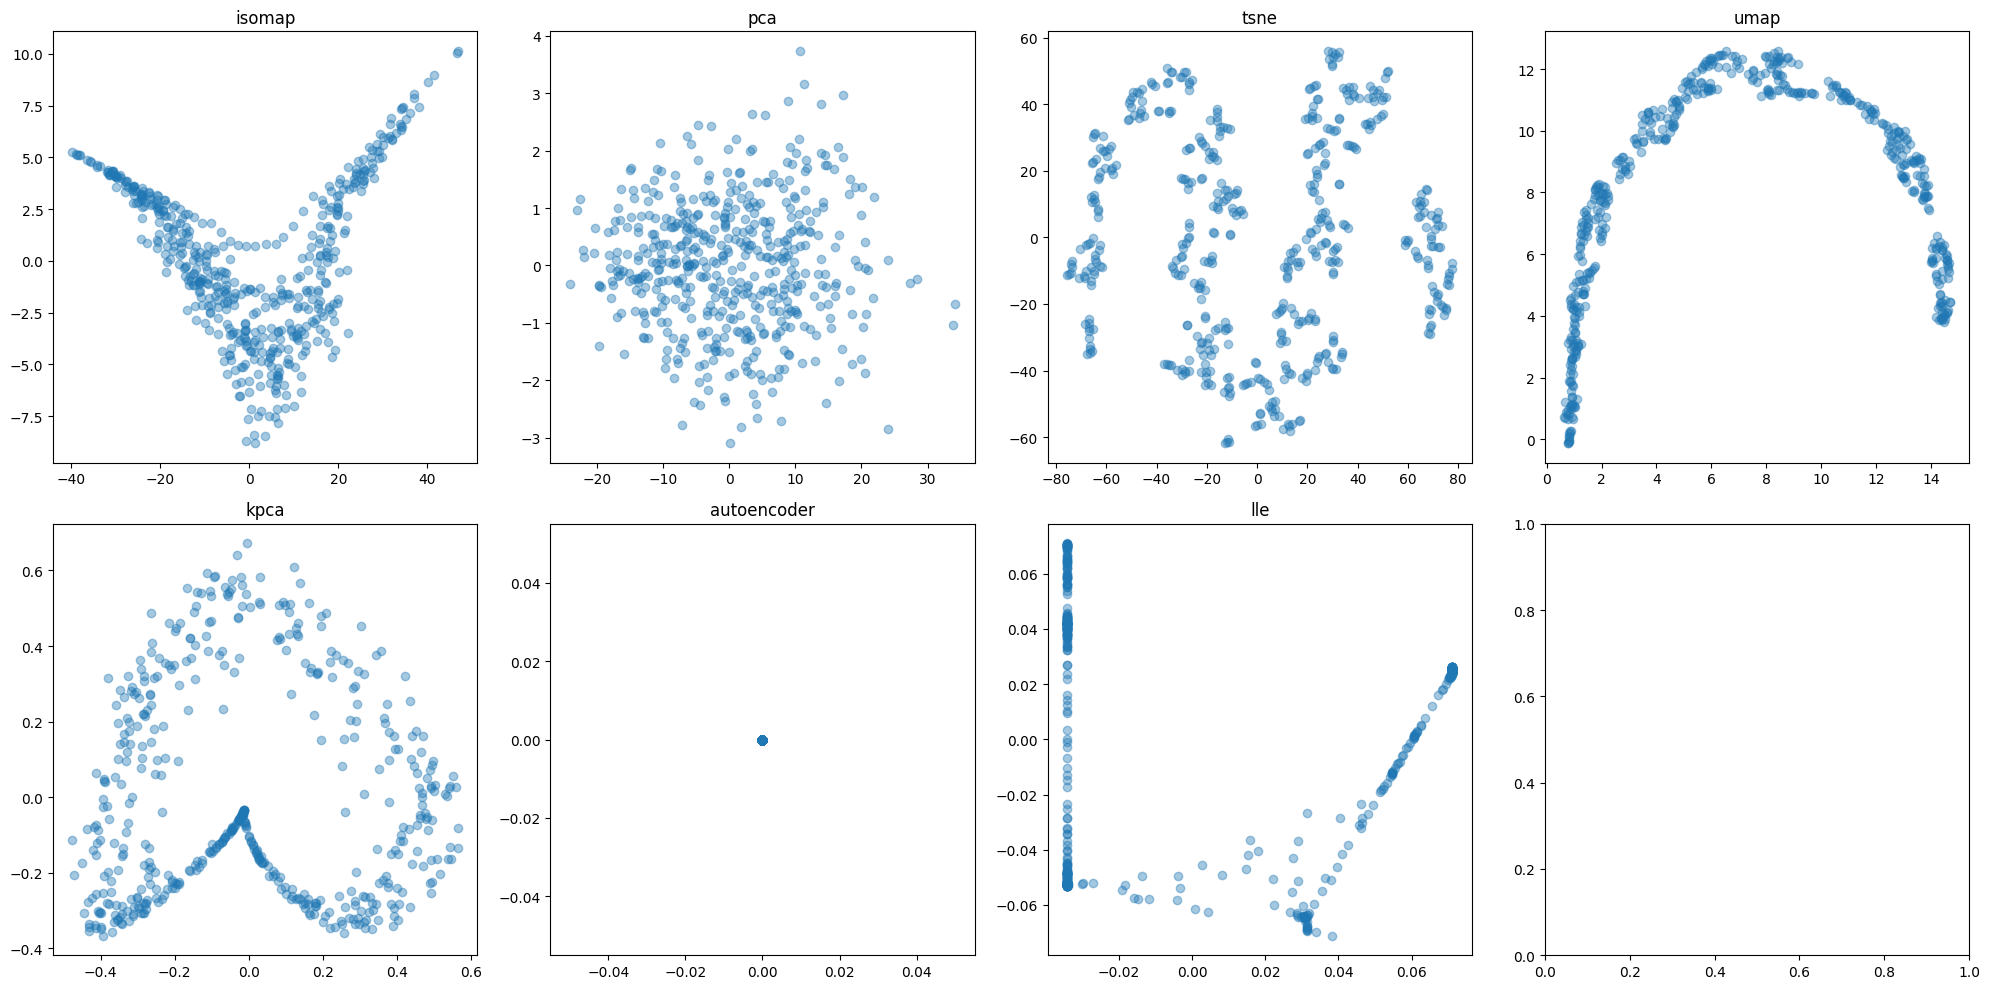

In [4]:
x, y = generate_polynomial_data(n_samples=500, input_dim=10, output_dim=5, max_degree=5)

add_noise = noise_model(torch.from_numpy(x))
noisy_x = add_noise(torch.from_numpy(x))

combined_data = np.hstack((noisy_x, y))

drm = drm.DimensionalityReductionHandler(combined_data)
drm.analyze_dimensionality_reduction(
    [
        "isomap",
        "PCA",
        "Tsne",
        "Umap",
        "kpca",
        "autoencoder",
        "lle",
    ]
)
drm.plot_results()
drm.table()
drm.visualization()